# Data Science in a Day

## Problem statement
Given data on loans that we've given in the past, we want to be able to predict whether a new customer should be given a loan or not. This is to aid decision making when it comes to offering loans at our bank.

## Loading Libraries

In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns
import pydotplus
import graphviz 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## Data Sourcing

In [6]:
loans = pd.read_csv('loan_data.csv')
loans.shape

(981, 13)

In [15]:
loans.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Data Cleaning 

In [4]:
loans.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP-0   Male      No          0      Graduate            No   
1    LP-1   Male     Yes          1      Graduate            No   
2    LP-2   Male     Yes          0      Graduate           Yes   
3    LP-3   Male     Yes          0  Not Graduate            No   
4    LP-4   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
loans.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  959.000000        967.000000   
mean       5179.795107        1601.916330  141.768509        340.078594   
std        5695.104533        2718.772806   77.899222         70.246667   
min           0.000000           0.000000    0.000000          0.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      931.000000  
mean         0.809882  
std          0.392605  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               968 non-null object
Married              978 non-null object
Dependents           966 non-null object
Education            981 non-null object
Self_Employed        949 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           959 non-null float64
Loan_Amount_Term     967 non-null float64
Credit_History       931 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


In [11]:
loans.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
loans.dropna(subset= ['Gender', 'Married', 'Loan_Amount_Term'], how = 'any', inplace= True)
loans['Dependents'] = loans['Dependents'].fillna('0')
loans['Self_Employed'] = loans['Self_Employed'].fillna('No')
loans['LoanAmount'] = loans['LoanAmount'].fillna(float(0))
loans['Credit_History'] = loans['Credit_History'].fillna(0.0)

In [13]:
loans.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
loans.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
loans['Loan_Status'].value_counts()

Y    623
N    328
Name: Loan_Status, dtype: int64

## Data Exploration

In [39]:
plt.rcParams['figure.figsize']=(15,10)

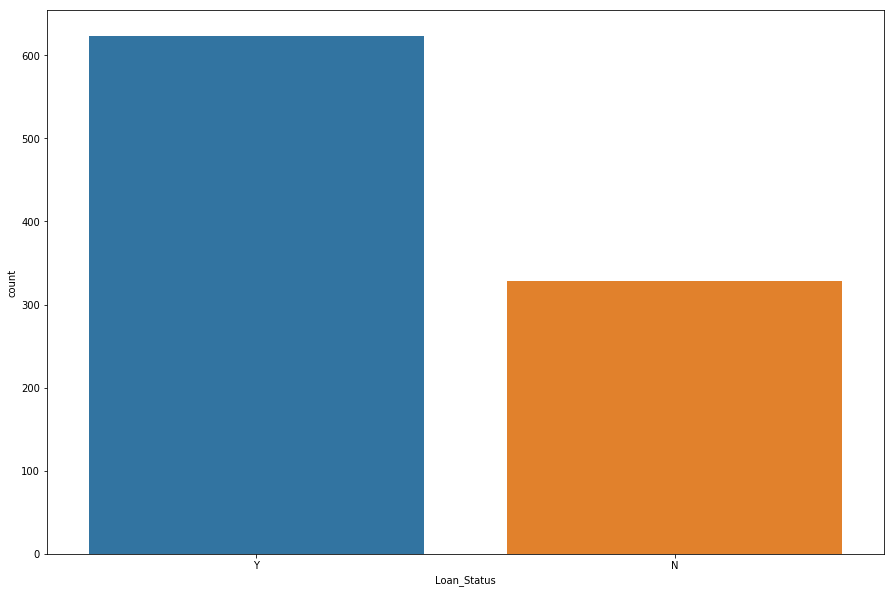

In [40]:
sns.countplot(x='Loan_Status', data=loans)

Text(0.5, 1.0, 'LoanAmount vs ApplicantIncome vs Loan_Status')

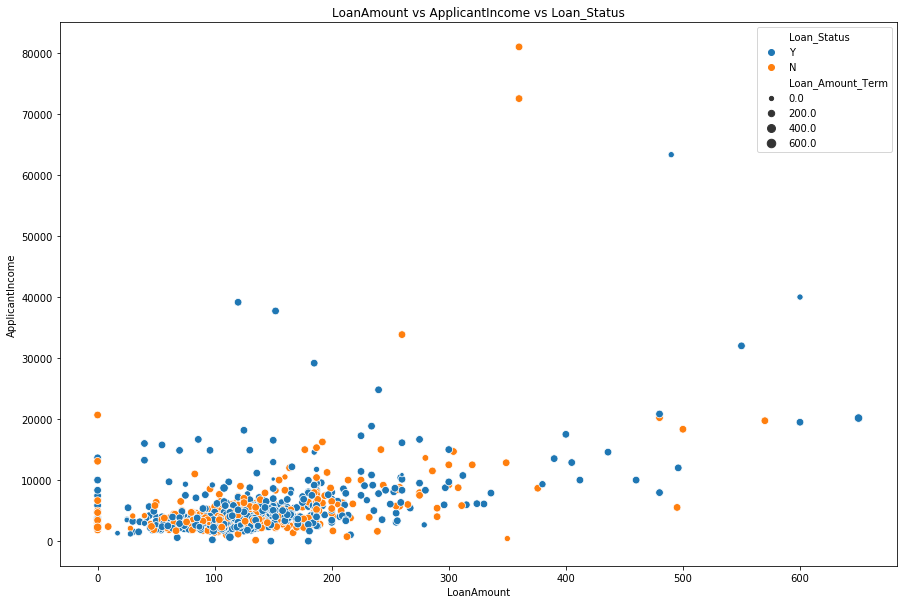

In [49]:
g = sns.scatterplot(x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', size='Loan_Amount_Term', data=loans)
g.set_title('LoanAmount vs ApplicantIncome vs Loan_Status')

Text(0.5, 1.0, 'Loan Status and Gender')

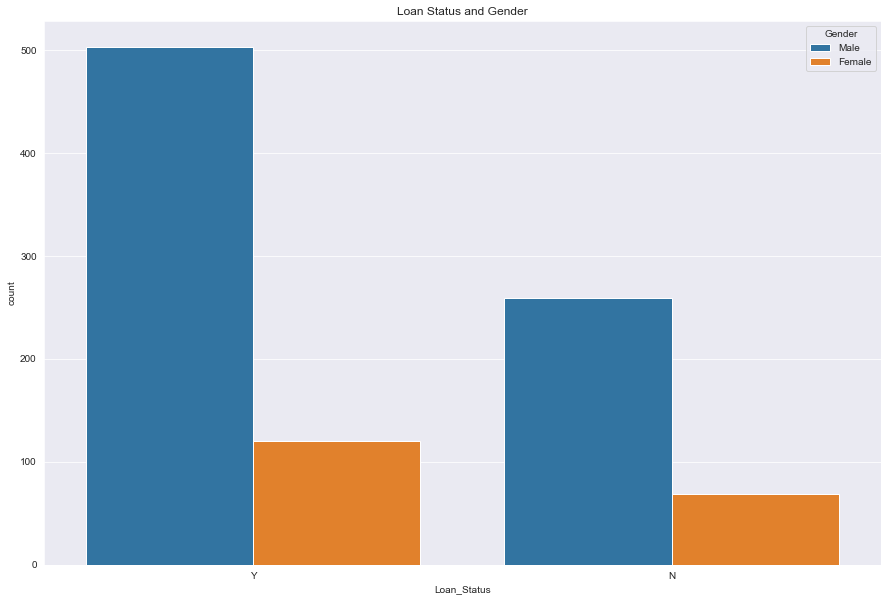

In [54]:
sns.set_style('darkgrid')
g = sns.countplot(x='Loan_Status', hue='Gender', data=loans)
g.set_title('Loan Status and Gender') 

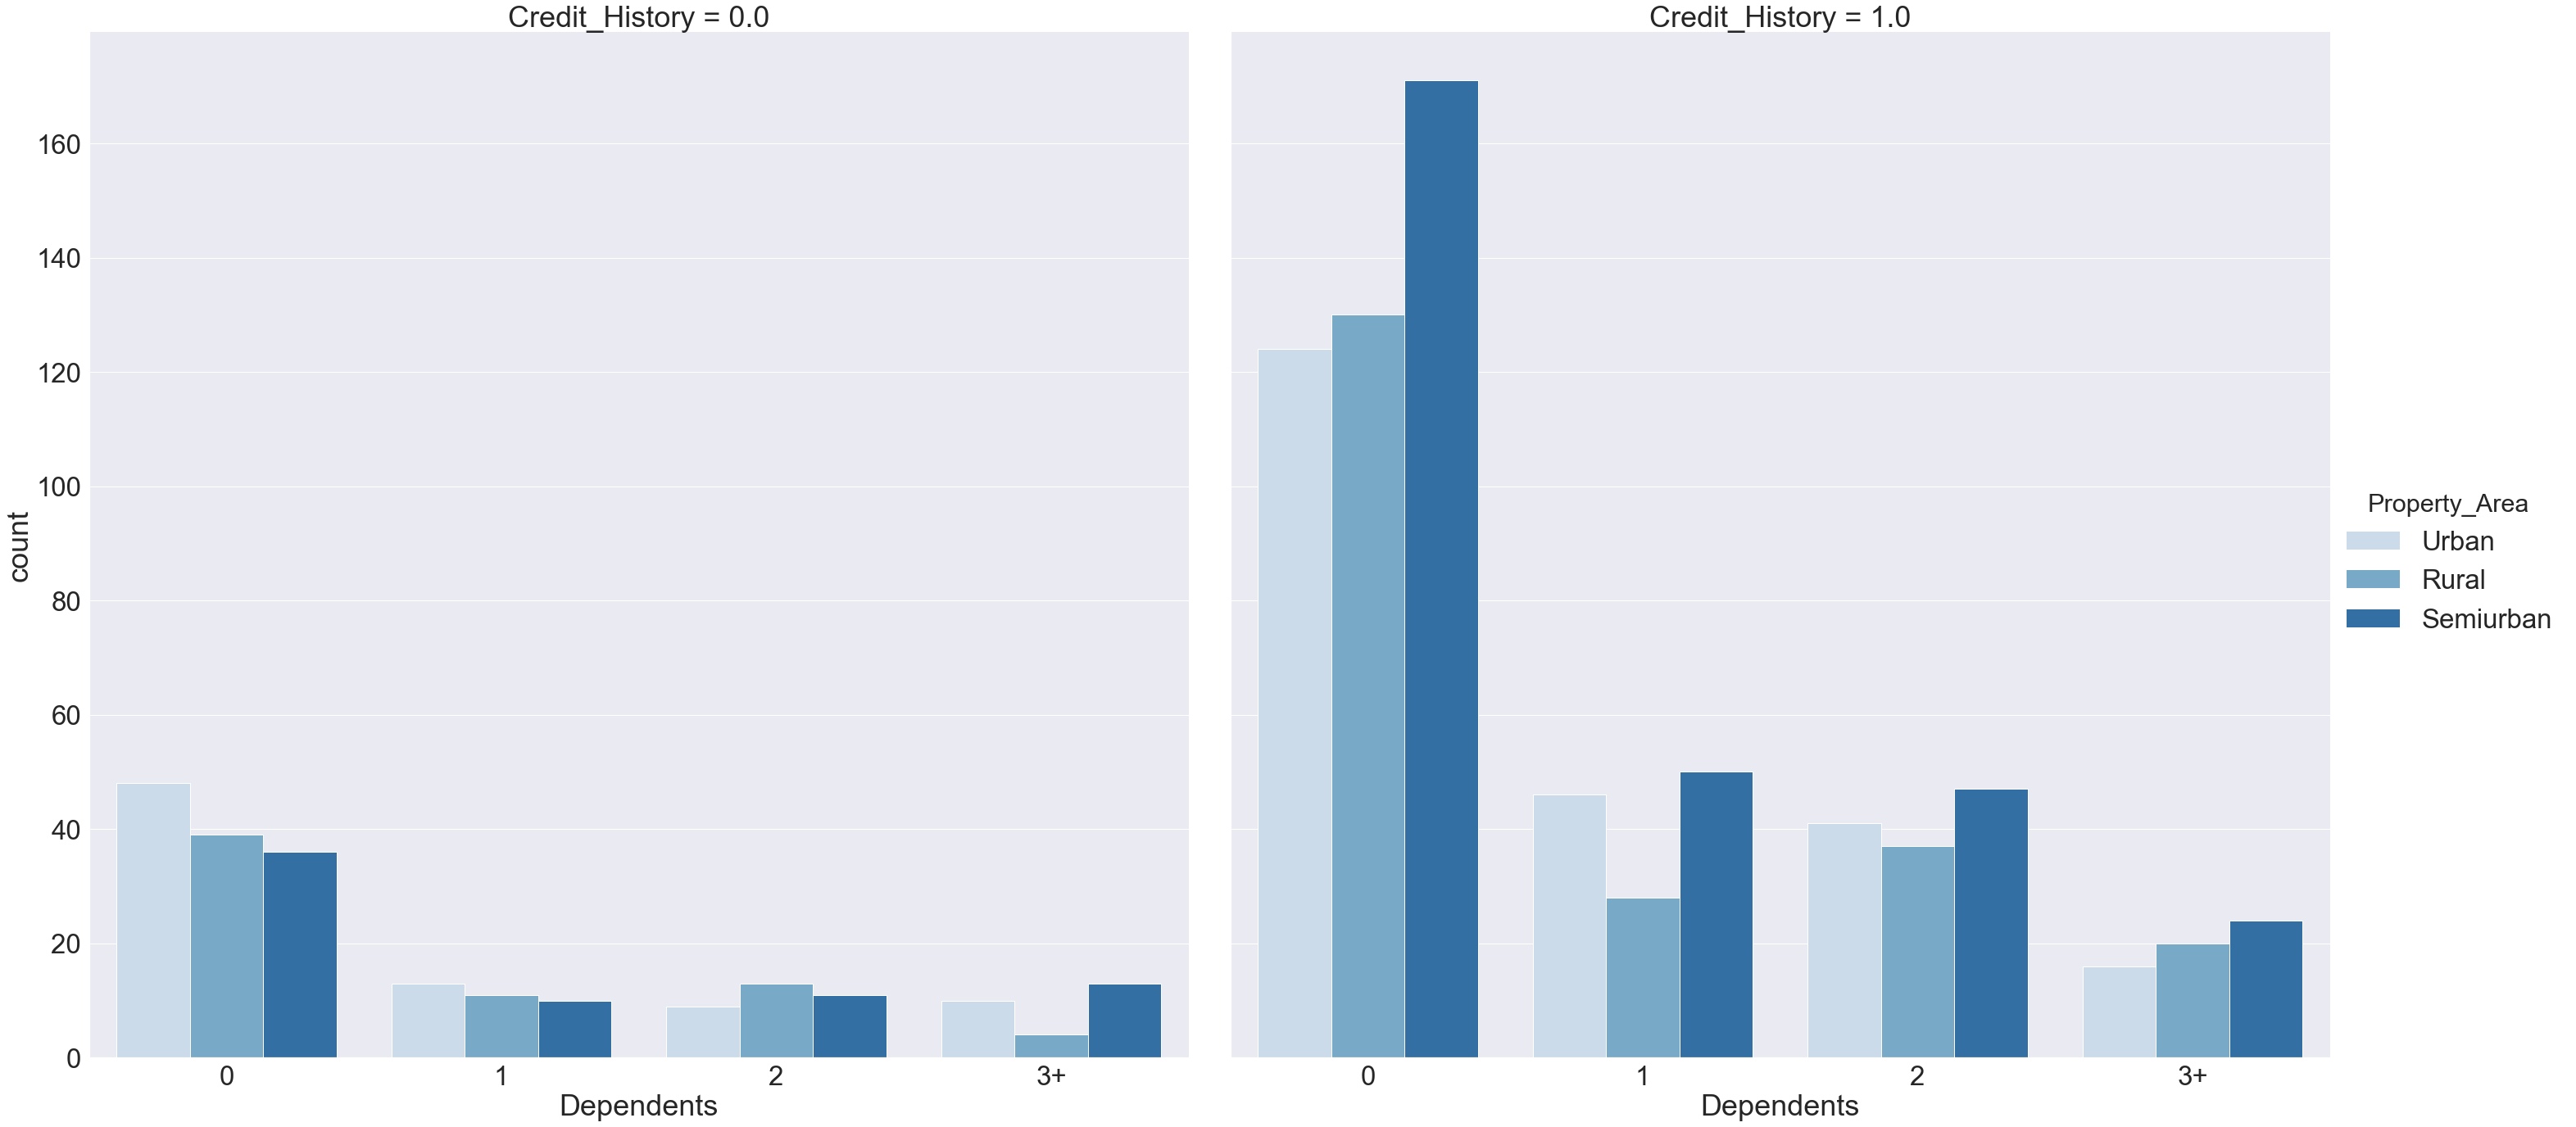

In [88]:
sns.set(font_scale=3)
g = sns.catplot(x='Dependents', hue='Property_Area', col='Credit_History', data=loans, kind='count',
                palette='Blues', height=20, aspect=1)

In [22]:
loans.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP-0   Male      No          0      Graduate            No   
1    LP-1   Male     Yes          1      Graduate            No   
2    LP-2   Male     Yes          0      Graduate           Yes   
3    LP-3   Male     Yes          0  Not Graduate            No   
4    LP-4   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         0.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## Data Transformation

In [89]:
loans.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP-0   Male      No          0      Graduate            No   
1    LP-1   Male     Yes          1      Graduate            No   
2    LP-2   Male     Yes          0      Graduate           Yes   
3    LP-3   Male     Yes          0  Not Graduate            No   
4    LP-4   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         0.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [90]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              951 non-null object
Gender               951 non-null object
Married              951 non-null object
Dependents           951 non-null object
Education            951 non-null object
Self_Employed        951 non-null object
ApplicantIncome      951 non-null int64
CoapplicantIncome    951 non-null float64
LoanAmount           951 non-null float64
Loan_Amount_Term     951 non-null float64
Credit_History       951 non-null float64
Property_Area        951 non-null object
Loan_Status          951 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 144.0+ KB


In [91]:
tree_df = loans.drop(columns=['Loan_ID', 'Gender'])
tree_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 980
Data columns (total 11 columns):
Married              951 non-null object
Dependents           951 non-null object
Education            951 non-null object
Self_Employed        951 non-null object
ApplicantIncome      951 non-null int64
CoapplicantIncome    951 non-null float64
LoanAmount           951 non-null float64
Loan_Amount_Term     951 non-null float64
Credit_History       951 non-null float64
Property_Area        951 non-null object
Loan_Status          951 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 129.2+ KB


In [92]:
tree_df.shape

(951, 11)

In [93]:
loans_features = tree_df.drop(columns=['Loan_Status'])
loans_features.shape

(951, 10)

In [94]:
loans_class = tree_df['Loan_Status']
loans_class.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [127]:
train_x, test_x, train_y, test_y = train_test_split(loans_features, loans_class, test_size=0.3, random_state=143)
(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

((665, 10), (665,), (286, 10), (286,))

In [128]:
len(labels)

18

In [129]:
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)
train_y = np.where(train_y == 'Y', 1,0)
test_y = np.where(test_y == 'Y', 1,0)

In [130]:
labels = list(train_x.columns)
(train_x.shape, train_y.shape, test_x.shape, test_y.shape, len(labels))

((665, 18), (665,), (286, 18), (286,), 18)

## Modelling

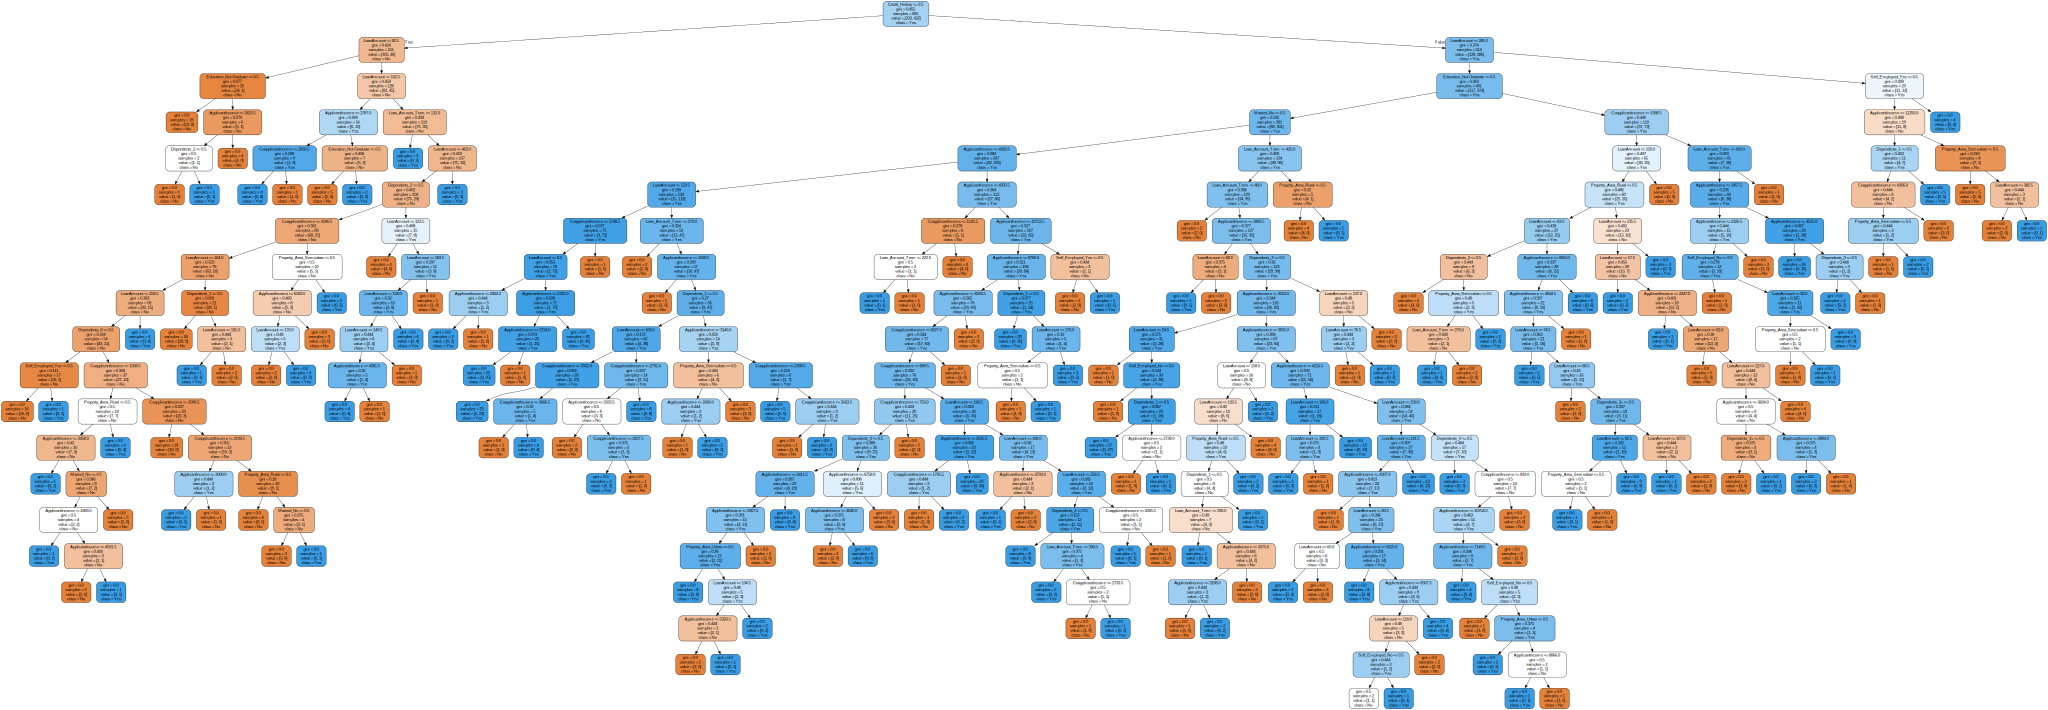

In [146]:
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)
# Visualize the tree
from IPython.display import display
graph = graphviz.Source(export_graphviz(clf, rounded=True, filled=True, class_names=['No', 'Yes'], feature_names=labels))
display(graph)
# graph.write_png("dtree.png")

In [116]:
clf.classes_

array([0, 1])

In [117]:
labels

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

### Making Predictions

Now that we've trained our models, it's time to put them to the test. We'll do this by predicting test set values and comparing those predictions to the values we already know are the ground truth. 

In [132]:
predictions = clf.predict(test_x)

In [134]:
print(confusion_matrix(test_y, predictions))  
print(classification_report(test_y, predictions))

[[ 45  50]
 [ 47 144]]
              precision    recall  f1-score   support

           0       0.49      0.47      0.48        95
           1       0.74      0.75      0.75       191

   micro avg       0.66      0.66      0.66       286
   macro avg       0.62      0.61      0.61       286
weighted avg       0.66      0.66      0.66       286



We need to compare those values with the test set!

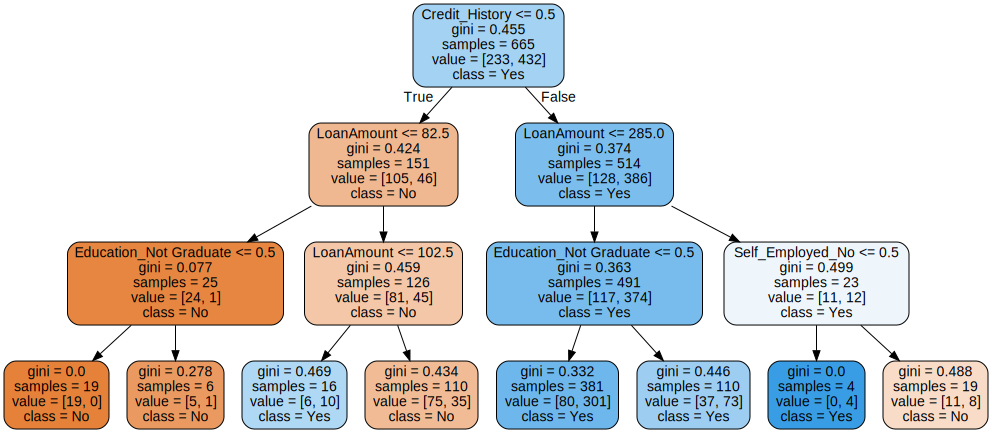

In [142]:
clf_shallow = DecisionTreeClassifier(max_depth= 3)
clf_shallow.fit(train_x,train_y)
# Visualize the tree
from IPython.display import display
graph = graphviz.Source(export_graphviz(clf_shallow, rounded=True, filled=True, class_names=['No', 'Yes'], feature_names=labels))
display(graph)
# graph.write_png("dtree.png")

In [136]:
predictions_shallow = clf_shallow.predict(test_x)

In [137]:
print(confusion_matrix(test_y, predictions_shallow))  
print(classification_report(test_y, predictions_shallow))

[[ 41  54]
 [ 23 168]]
              precision    recall  f1-score   support

           0       0.64      0.43      0.52        95
           1       0.76      0.88      0.81       191

   micro avg       0.73      0.73      0.73       286
   macro avg       0.70      0.66      0.66       286
weighted avg       0.72      0.73      0.71       286



## Model Evaluation

Q: Which model is better? 
> A: Shallow model is slightly better.


Q: Why?
> A:

Link to *Stupid Data Miner tricks paper* (Overfitting the S&P 500)
https://www.researchgate.net/publication/247907373_Stupid_Data_Miner_Tricks_Overfitting_the_SP_500

In [143]:
export_graphviz(clf_shallow, out_file='tree.dot', rounded=True, filled=True, class_names=['No', 'Yes'], feature_names=labels)

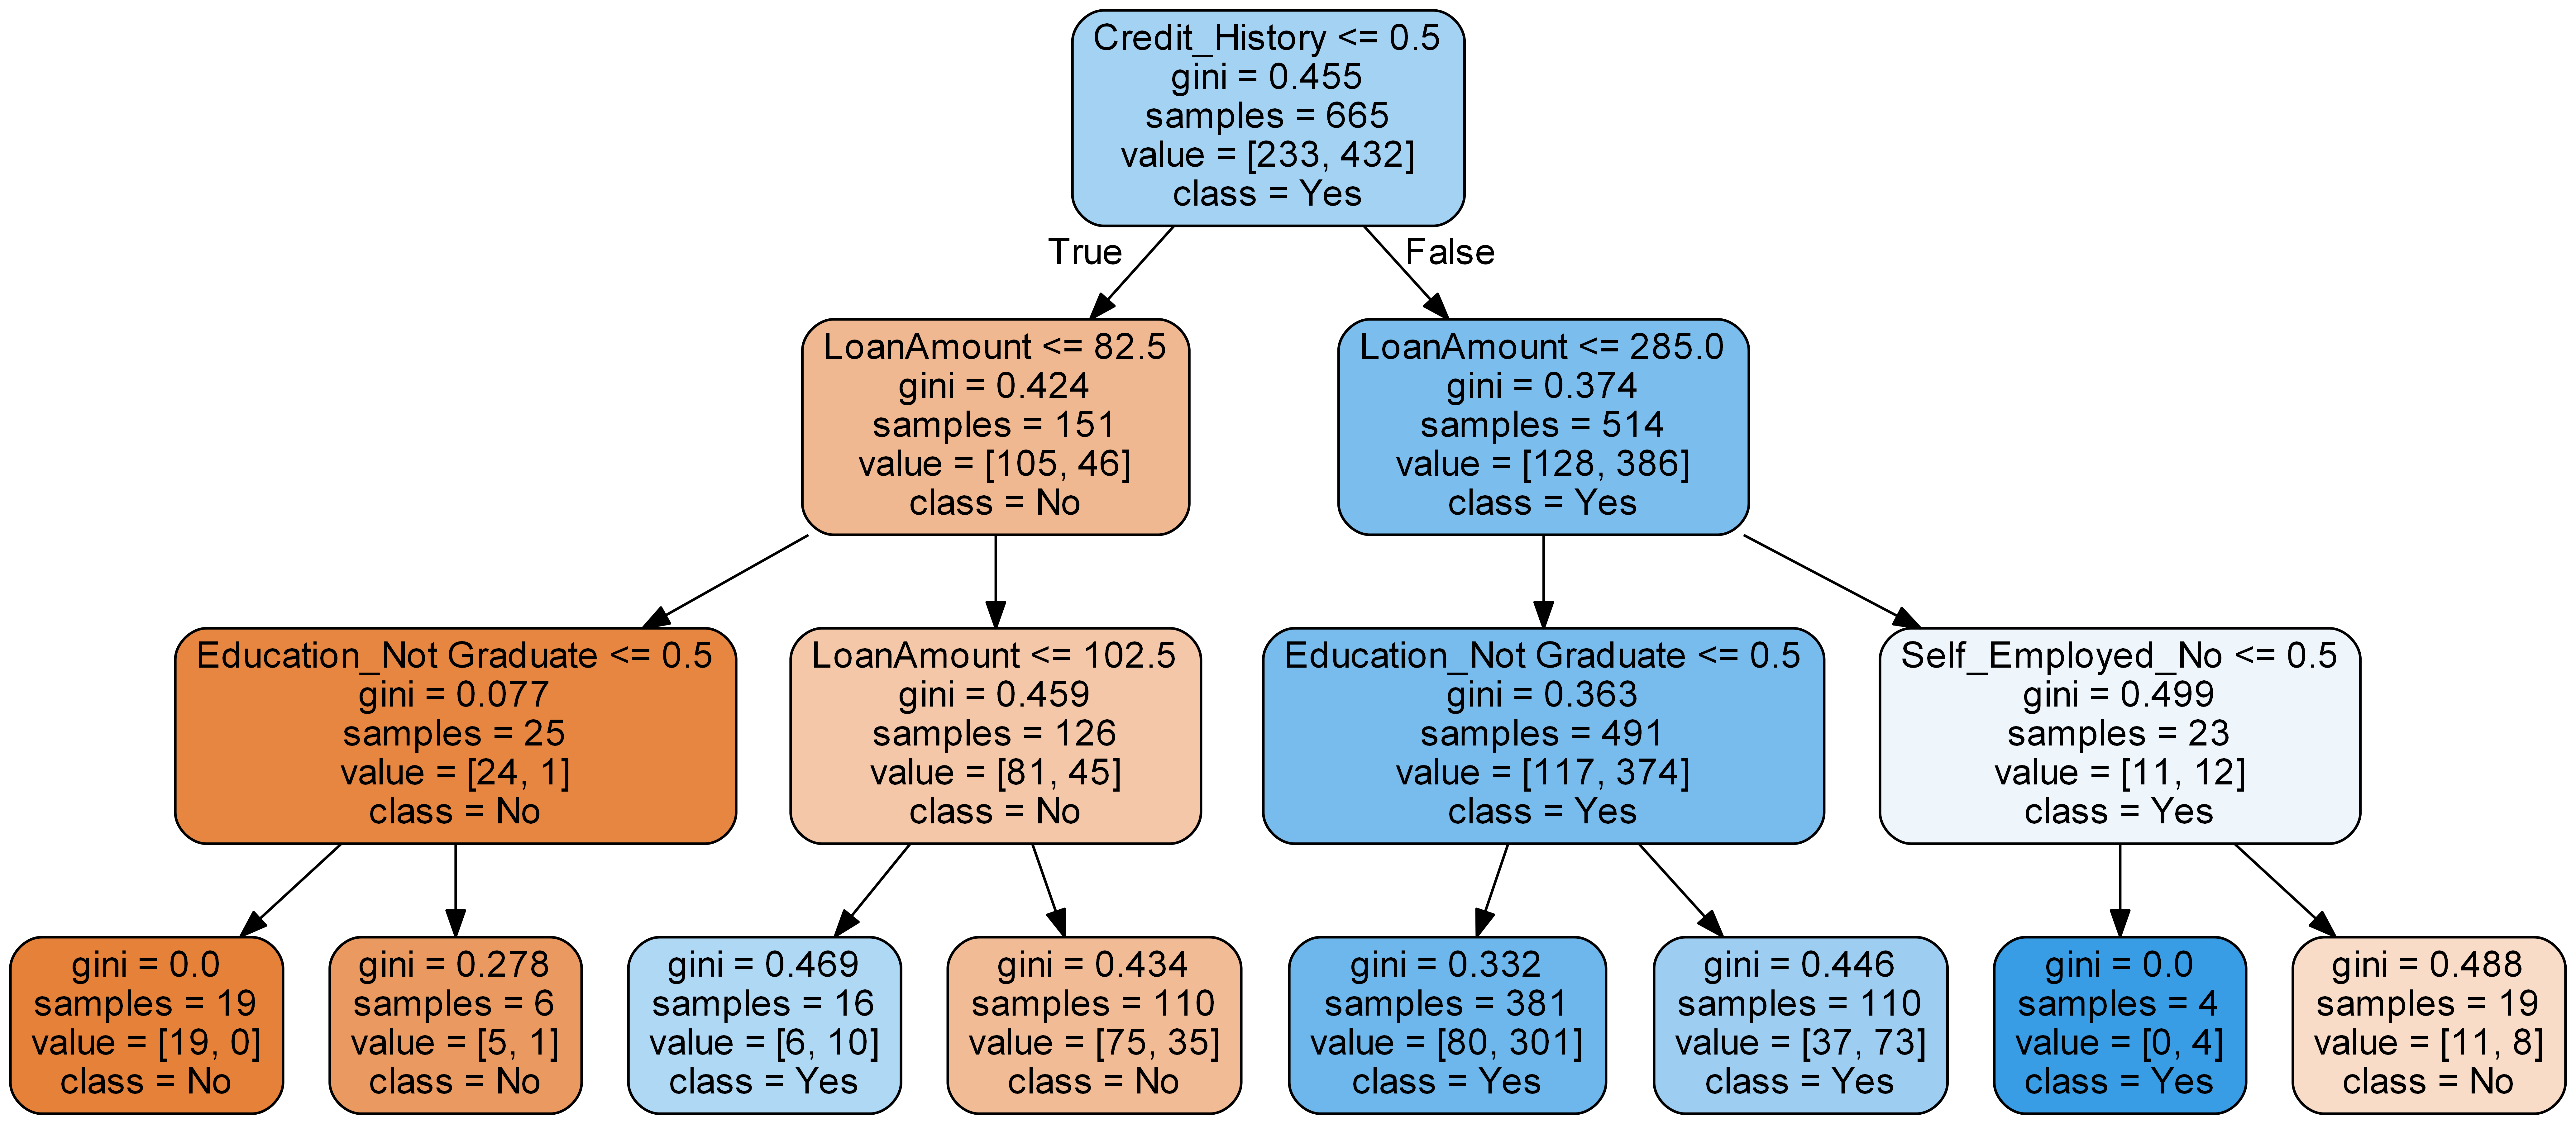

In [144]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

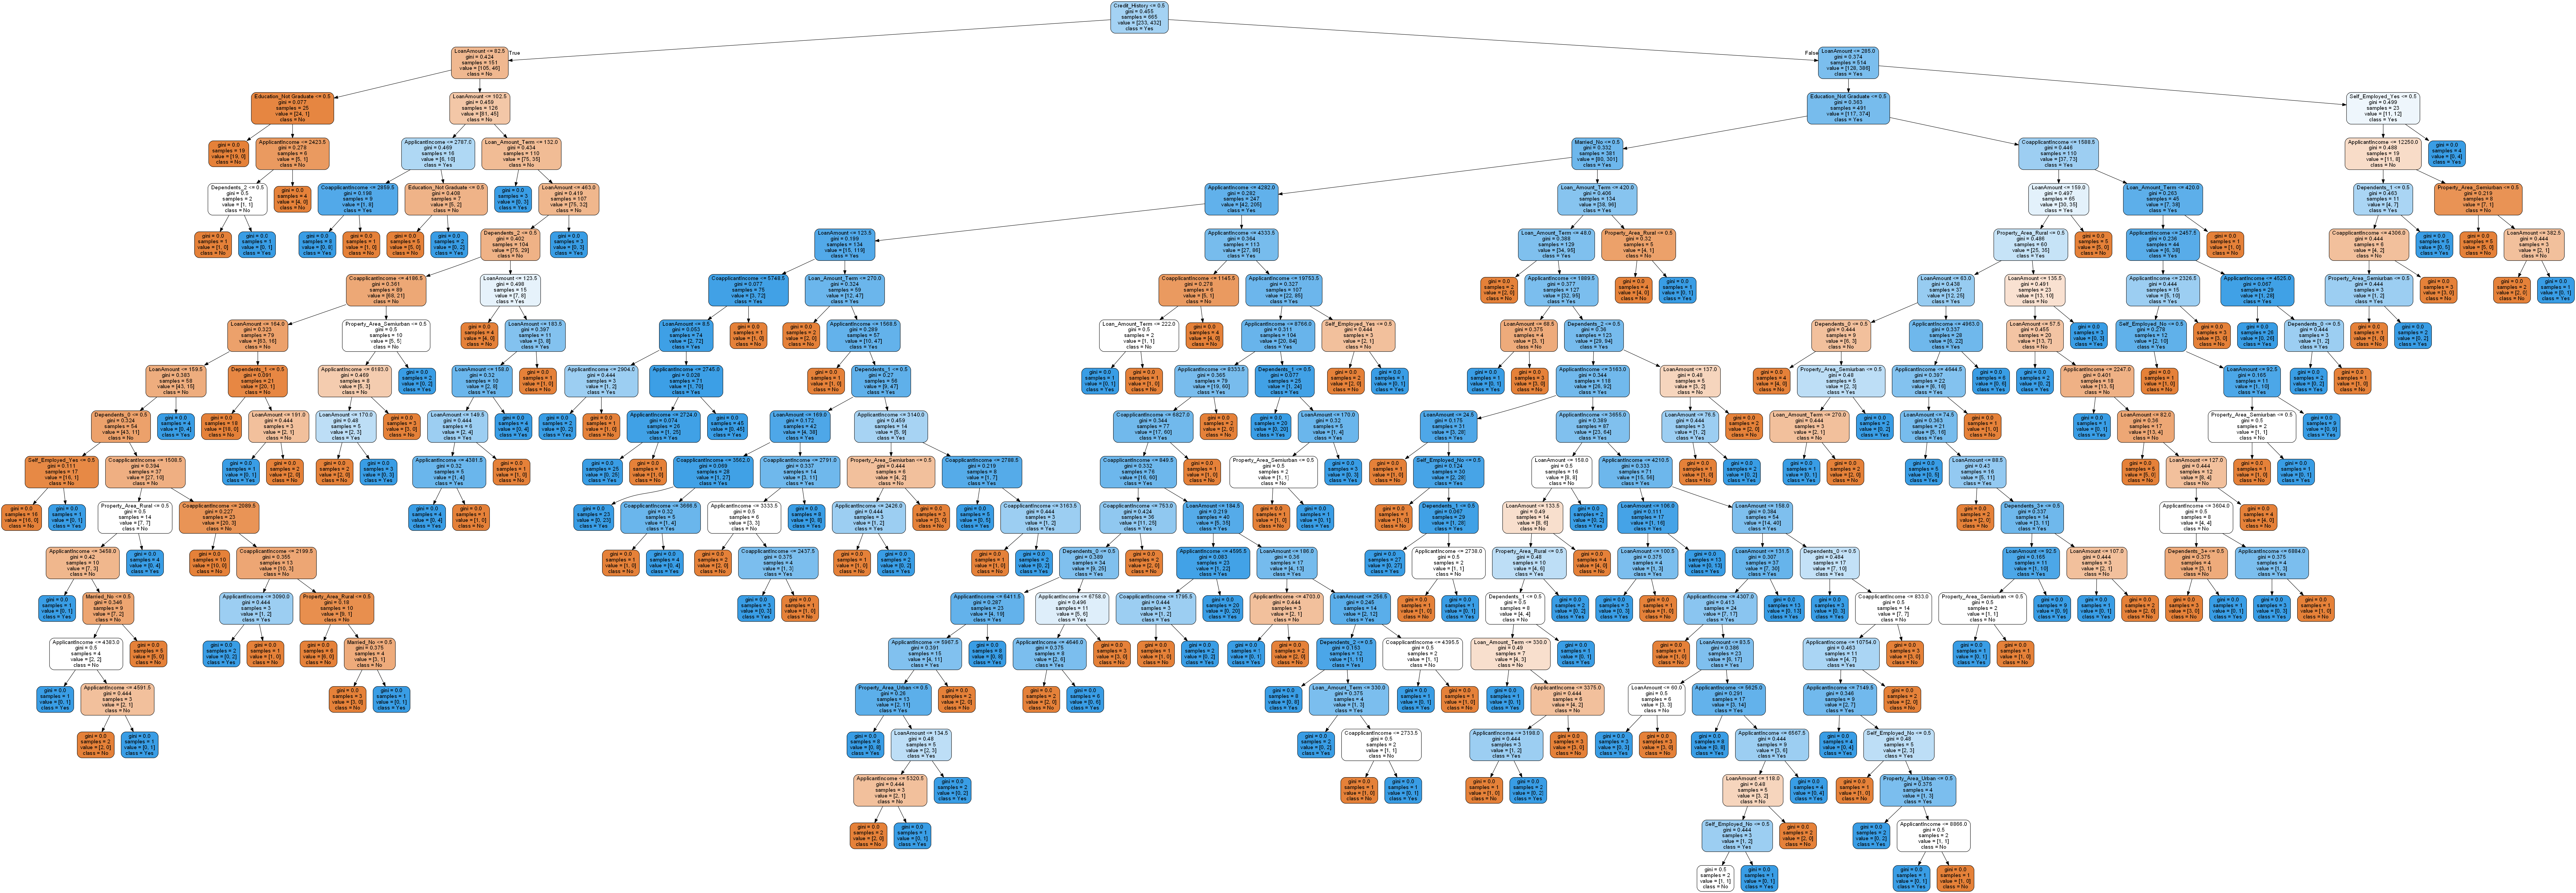

In [149]:
export_graphviz(clf, out_file='tree_full.dot', rounded=True, filled=True, class_names=['No', 'Yes'], feature_names=labels)
from subprocess import call
call(['dot', '-Tpng', 'tree_full.dot', '-o', 'tree_full.png', '-Gdpi=100'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_full.png')